PART II

In [19]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from collections import Counter
from spacy.lang.en import English 

In [20]:
# Load the DataFrames
traffic_df = pd.read_csv('/Users/user/Desktop/martin_1/archive/traffic.csv')
data_df = pd.read_csv('/Users/user/Desktop/martin_1/archive/rating.csv')
domains_df = pd.read_csv('/Users/user/Desktop/martin_1/archive/domains_location.csv')
d_df = pd.read_csv('/Users/user/Desktop/martin_1/archive/data.csv')



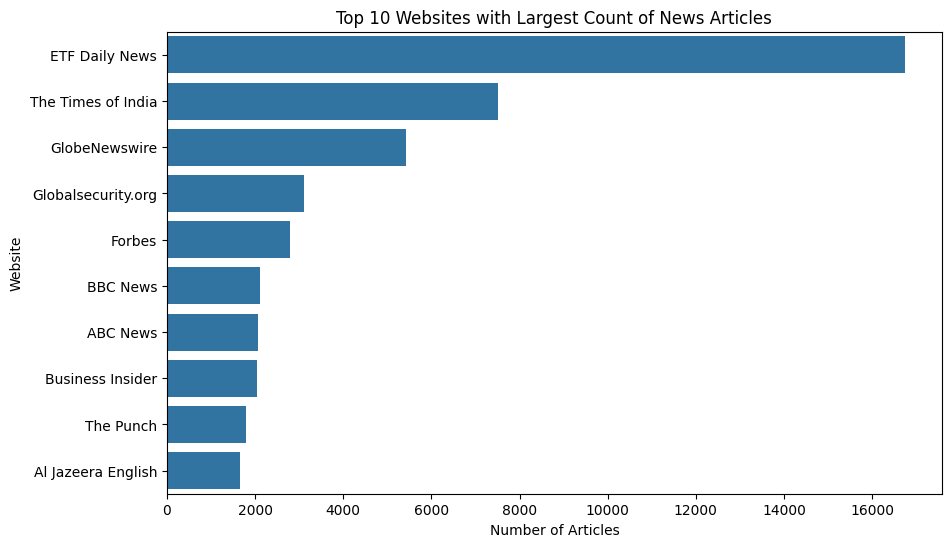

In [21]:
#Top and bottom 10 websites with the largest count of news articles
top_10_websites = data_df['source_name'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_websites.values, y=top_10_websites.index)
plt.title('Top 10 Websites with Largest Count of News Articles')
plt.xlabel('Number of Articles')
plt.ylabel('Website')
plt.show()

In [22]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58356 entries, 0 to 58355
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   article_id       58356 non-null  int64 
 1   source_id        17771 non-null  object
 2   source_name      58356 non-null  object
 3   author           56193 non-null  object
 4   title            58356 non-null  object
 5   description      58346 non-null  object
 6   url              58356 non-null  object
 7   url_to_image     54905 non-null  object
 8   published_at     58356 non-null  object
 9   content          58356 non-null  object
 10  category         58335 non-null  object
 11  article          58356 non-null  object
 12  title_sentiment  58356 non-null  object
dtypes: int64(1), object(12)
memory usage: 5.8+ MB


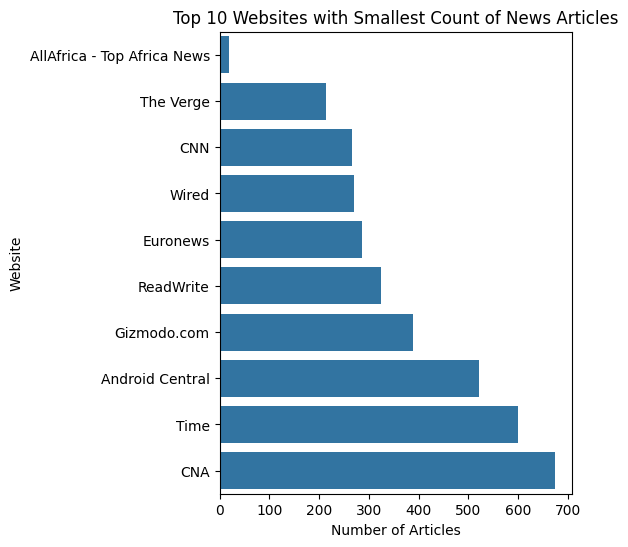

In [23]:
# bottom 10 websites with the largest count of news articles
bottom_10_websites = data_df['source_name'].value_counts().nsmallest(10)
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 2)
sns.barplot(x=bottom_10_websites.values, y=bottom_10_websites.index,legend=False)
plt.title('Top 10 Websites with Smallest Count of News Articles')
plt.xlabel('Number of Articles')
plt.ylabel('Website')
plt.show()

In [24]:
traffic_df.dropna(subset=['Domain', 'GlobalRank'], inplace=True)

top_traffic_websites = traffic_df.sort_values(by='GlobalRank').head(10)

print(top_traffic_websites[['Domain', 'GlobalRank']])

                 Domain  GlobalRank
0            google.com           1
1          facebook.com           2
2           youtube.com           3
3           twitter.com           4
4         instagram.com           5
5          linkedin.com           6
6             apple.com           7
7         microsoft.com           8
8  googletagmanager.com           9
9         wikipedia.org          10


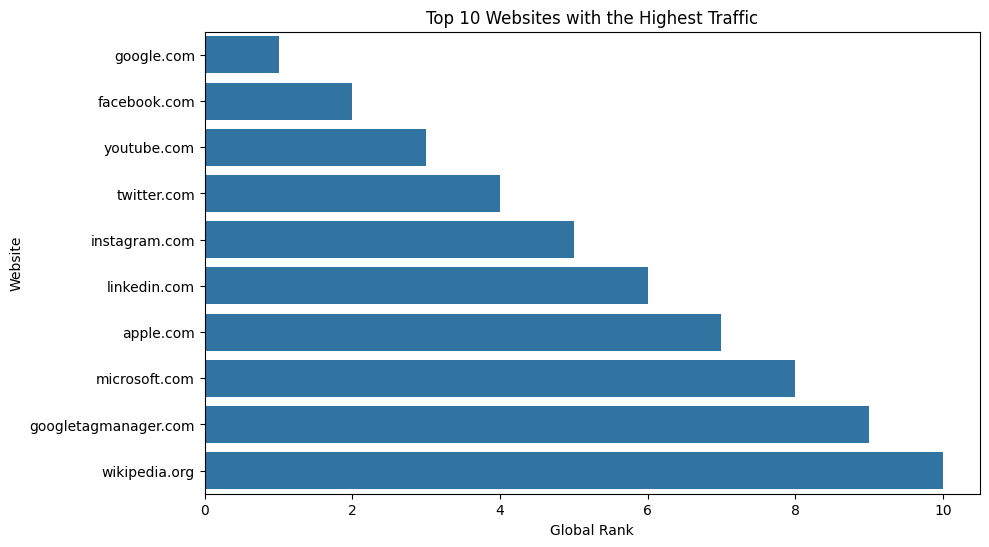

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='GlobalRank', y='Domain', data=top_traffic_websites)

plt.xlabel('Global Rank')
plt.ylabel('Website')
plt.title('Top 10 Websites with the Highest Traffic')
plt.show()

Countries with the highest number of news media organisations (represented by domains in the data)

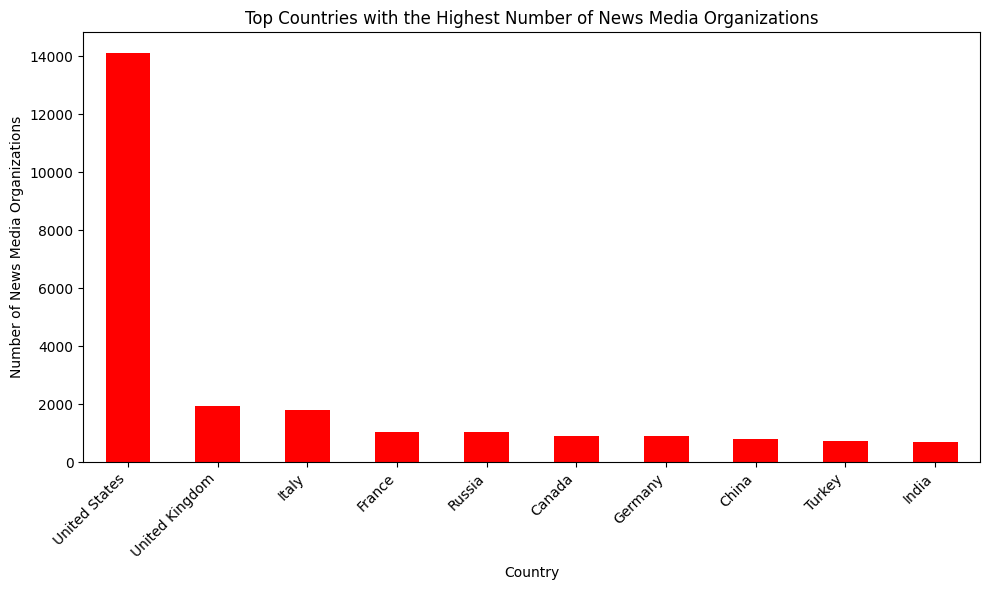

In [26]:
#Countries with the highest number of news media organisations (represented by domains in the data)

domains_df.dropna(subset=['Country', 'SourceCommonName'], inplace=True)
country_counts = domains_df['Country'].value_counts()
top_countries = country_counts.head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='red')
plt.xlabel('Country')
plt.ylabel('Number of News Media Organizations')
plt.title('Top Countries with the Highest Number of News Media Organizations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Countries with the Highest Number of Articles Mentioning Them

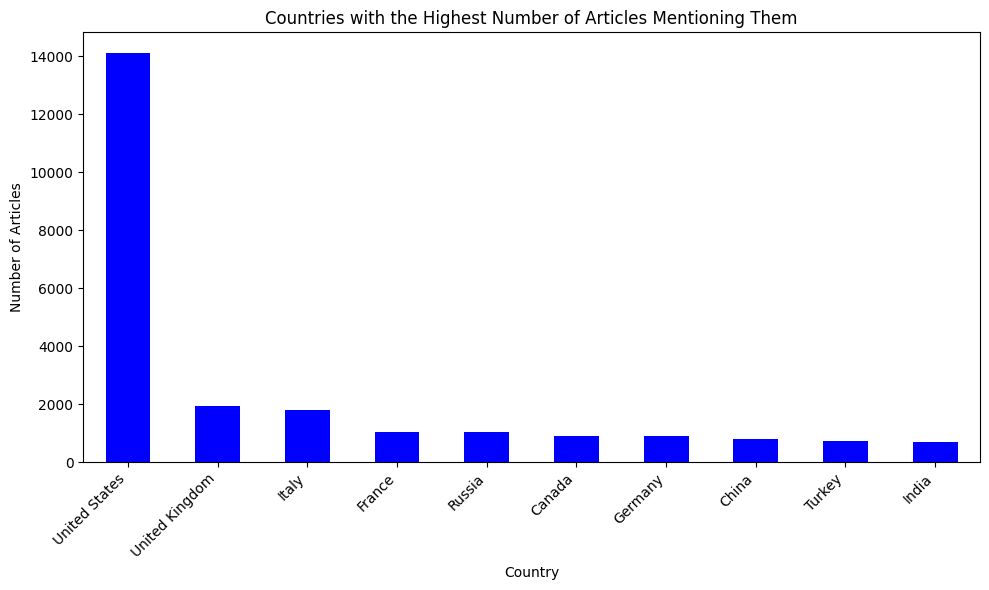

In [27]:
# Filter articles to include only those that mention countries
articles_with_countries = domains_df.dropna(subset=['Country'])
# Split the 'countries' column into a list of countries
articles_with_countries['Country'] = articles_with_countries['Country'].apply(lambda x: x.split(','))
# Create a list of all mentioned countries
all_countries = [country.strip() for sublist in articles_with_countries['Country'] for country in sublist]
# Count the occurrences of each country
country_counts = pd.Series(all_countries).value_counts()
# Plotting
plt.figure(figsize=(10, 6))
country_counts.head(10).plot(kind='bar', color='blue')  # Plot top 10 countries
plt.xlabel('Country')
plt.ylabel('Number of Articles')
plt.title('Countries with the Highest Number of Articles Mentioning Them')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [28]:
data_df.columns

Index(['article_id', 'source_id', 'source_name', 'author', 'title',
       'description', 'url', 'url_to_image', 'published_at', 'content',
       'category', 'article', 'title_sentiment'],
      dtype='object')

Websites reporting news content about the specified regions

In [29]:

# Define dictionaries mapping countries to their respective regions
african_countries = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Republic of the Congo', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']
eu_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']
middle_east_countries = ['Bahrain', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Syria', 'Turkey', 'United Arab Emirates', 'Yemen']
us_countries = ['United States', 'USA', 'U.S.']
china_countries = ['China']

# Combine the regions and their respective countries into a dictionary
region_countries_dict = {
    'Africa': african_countries,
    'EU': eu_countries,
    'Middle East': middle_east_countries,
    'US': us_countries,
    'China': china_countries
}

# Filter articles containing mentions of the specified regions
articles_about_regions = data_df[data_df['content'].str.contains('|'.join(sum(region_countries_dict.values(), [])))]

# Get the websites that reported news content about the specified regions
websites_reporting_about_regions = articles_about_regions['source_name'].unique()

print("Websites reporting news content about the specified regions:")
print(websites_reporting_about_regions)


Websites reporting news content about the specified regions:
['Phys.Org' 'Al Jazeera English' 'BBC News' 'The Punch' 'Euronews' 'CNA'
 'The Indian Express' 'Globalsecurity.org' 'Marketscreener.com' 'RT'
 'ABC News' 'Forbes' 'The Times of India' 'Time' 'Wired' 'NPR'
 'Business Insider' 'Deadline' 'Digital Trends'
 'International Business Times' 'GlobeNewswire' 'CNN' 'ReadWrite'
 'Boing Boing' 'Gizmodo.com' 'ETF Daily News' 'Android Central'
 'The Verge' 'AllAfrica - Top Africa News']


Top Sources Reporting News Content about Specified Regions

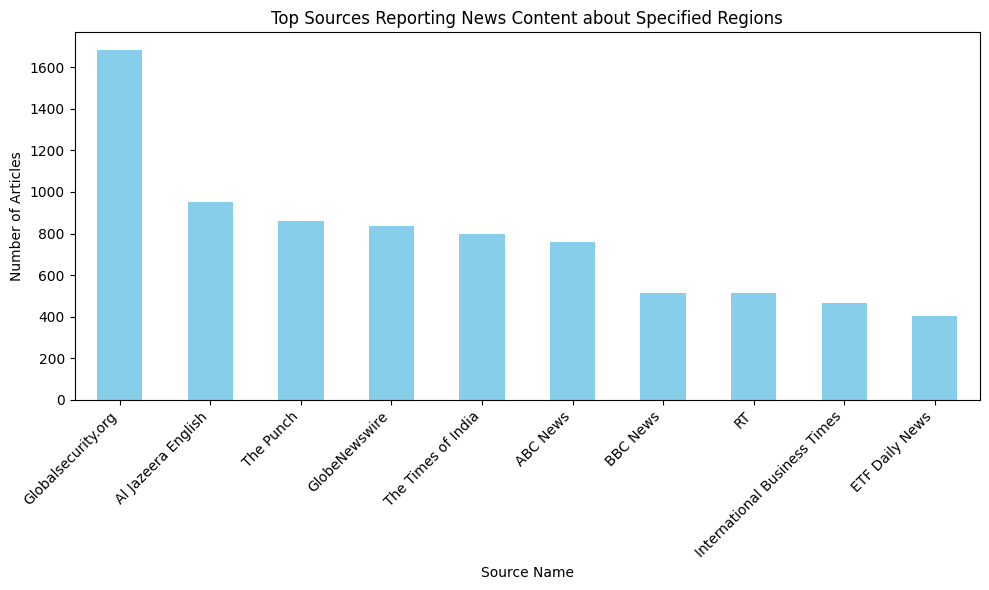

In [30]:


# Define dictionaries mapping countries to their respective regions
african_countries = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Republic of the Congo', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']
eu_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']
middle_east_countries = ['Bahrain', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Syria', 'Turkey', 'United Arab Emirates', 'Yemen']
us_countries = ['United States', 'USA', 'U.S.']
china_countries = ['China']

# Combine the regions and their respective countries into a dictionary
region_countries_dict = {
    'Africa': african_countries,
    'EU': eu_countries,
    'Middle East': middle_east_countries,
    'US': us_countries,
    'China': china_countries
}

# Filter articles containing mentions of the specified regions
articles_about_regions = data_df[data_df['content'].str.contains('|'.join(sum(region_countries_dict.values(), [])))]

# Get the source names that reported news content about the specified regions
sources_reporting_about_regions = articles_about_regions['source_name']

# Count the occurrences of each source
source_counts = sources_reporting_about_regions.value_counts()

# Plotting
plt.figure(figsize=(10, 6))
source_counts.head(10).plot(kind='bar', color='skyblue')  # Plot top 10 sources
plt.xlabel('Source Name')
plt.ylabel('Number of Articles')
plt.title('Top Sources Reporting News Content about Specified Regions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [31]:
domains_df.columns


Index(['SourceCommonName', 'location', 'Country'], dtype='object')

In [32]:
traffic_df.columns

Index(['GlobalRank', 'TldRank', 'Domain', 'TLD', 'RefSubNets', 'RefIPs',
       'IDN_Domain', 'IDN_TLD', 'PrevGlobalRank', 'PrevTldRank',
       'PrevRefSubNets', 'PrevRefIPs'],
      dtype='object')

In [33]:
data_df.columns

Index(['article_id', 'source_id', 'source_name', 'author', 'title',
       'description', 'url', 'url_to_image', 'published_at', 'content',
       'category', 'article', 'title_sentiment'],
      dtype='object')

Top/bottom 10 websites by mean sentiment

In [34]:
#Since title_sentiment is not numeric ('object'), we need to convert it to a numeric data 
print(data_df['title_sentiment'].dtype)
#This attempts to convert the column to numeric, replacing non-numeric values with NaN.
data_df['title_sentiment'] = pd.to_numeric(data_df['title_sentiment'], errors='coerce')  # Coerce errors to NaN
website_sentiment = data_df.groupby('source_name')['title_sentiment'].agg(['mean', 'median', 'var']).reset_index()
# Print results (showing websites with high/low sentiment can be achieved through sorting)
print("Website Sentiment Statistics (Mean, Median, Variance):")
print(website_sentiment.to_string(index=True))

object
Website Sentiment Statistics (Mean, Median, Variance):
                     source_name  mean  median  var
0                       ABC News   NaN     NaN  NaN
1             Al Jazeera English   NaN     NaN  NaN
2    AllAfrica - Top Africa News   NaN     NaN  NaN
3                Android Central   NaN     NaN  NaN
4                       BBC News   NaN     NaN  NaN
5                    Boing Boing   NaN     NaN  NaN
6               Business Insider   NaN     NaN  NaN
7                            CNA   NaN     NaN  NaN
8                            CNN   NaN     NaN  NaN
9                       Deadline   NaN     NaN  NaN
10                Digital Trends   NaN     NaN  NaN
11                ETF Daily News   NaN     NaN  NaN
12                      Euronews   NaN     NaN  NaN
13                        Forbes   NaN     NaN  NaN
14                   Gizmodo.com   NaN     NaN  NaN
15            Globalsecurity.org   NaN     NaN  NaN
16                 GlobeNewswire   NaN     NaN  NaN
17

In [36]:
# Sort websites by sentiment metric (e.g., mean sentiment)
website_sentiment_sorted_mean = website_sentiment.sort_values(by='mean', ascending=False)  # Sort by descending mean
# Print top/bottom 10 websites by mean sentiment
print("\nTop 10 Websites by Mean Sentiment (Descending):")
print(website_sentiment_sorted_mean.head(10))

print("\nBottom 10 Websites by Mean Sentiment (Ascending):")
print(website_sentiment_sorted_mean.tail(10))


Top 10 Websites by Mean Sentiment (Descending):
                   source_name  mean  median  var
0                     ABC News   NaN     NaN  NaN
1           Al Jazeera English   NaN     NaN  NaN
2  AllAfrica - Top Africa News   NaN     NaN  NaN
3              Android Central   NaN     NaN  NaN
4                     BBC News   NaN     NaN  NaN
5                  Boing Boing   NaN     NaN  NaN
6             Business Insider   NaN     NaN  NaN
7                          CNA   NaN     NaN  NaN
8                          CNN   NaN     NaN  NaN
9                     Deadline   NaN     NaN  NaN

Bottom 10 Websites by Mean Sentiment (Ascending):
           source_name  mean  median  var
19                 NPR   NaN     NaN  NaN
20            Phys.Org   NaN     NaN  NaN
21                  RT   NaN     NaN  NaN
22           ReadWrite   NaN     NaN  NaN
23  The Indian Express   NaN     NaN  NaN
24           The Punch   NaN     NaN  NaN
25  The Times of India   NaN     NaN  NaN
26           T

mean, median, and visualizations to analyze sentiment by website and compare the impact of mean vs. median


In [37]:
# Group by website and calculate statistics
website_sentiment = data_df.groupby('source_name')['title_sentiment'].agg(['mean', 'median', 'var']).reset_index()

In [44]:
sentiment_stats_by_website = data_df.groupby('source_name')['title_sentiment'].agg(['mean', 'median', 'var'])

In [45]:
top_10_domains = data_df['source_name'].value_counts().head(10).index


In [46]:
top_10_domains_data = data_df[data_df['source_name'].isin(top_10_domains)]

In [ ]:

# Assuming your dataset has columns for website domain and sentiment score (positive, neutral, negative)

# Group the data by website domain and calculate descriptive statistics
sentiment_stats_by_website = data_df.groupby('source_name')['title_sentiment'].agg(['mean', 'median', 'var'])

# Get the top 10 domains by visitors traffic (you need to have visitor traffic data)
top_10_domains = data_df['source_name'].value_counts().head(10).index

# Filter the data to include only the top 10 domains
top_10_domains_data = data_df[data_df['source_name'].isin(top_10_domains)]

# Plot the distribution of sentiments for the top 10 domains
plt.figure(figsize=(12, 6))
for domain in top_10_domains:
    domain_data = top_10_domains_data[top_10_domains_data['source_name'] == domain]['title_sentiment']
    plt.hist(domain_data, bins=20, alpha=0.5, label=domain)

# Plot the global news sentiment distribution
global_sentiment = data_df['title_sentiment']
plt.hist(global_sentiment, bins=20, alpha=0.5, label='Global News Sentiment')

plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiments for Top 10 Domains vs Global News Sentiment')
plt.legend()
plt.show()


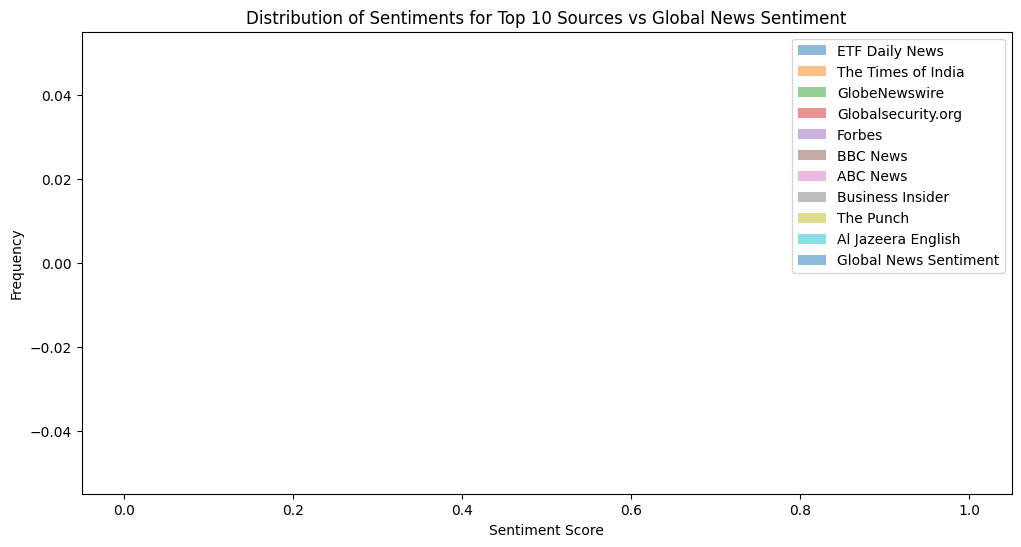

In [53]:

# Assuming your dataset has columns for source name and sentiment score (positive, neutral, negative)

# Group the data by source name and calculate descriptive statistics
sentiment_stats_by_source = data_df.groupby('source_name')['title_sentiment'].agg(['mean', 'median', 'var'])

# Get the top 10 sources by visitor traffic (you need to have visitor traffic data)
top_10_sources = data_df['source_name'].value_counts().head(10).index

# Filter the data to include only the top 10 sources
top_10_sources_data = data_df[data_df['source_name'].isin(top_10_sources)]

# Plot the distribution of sentiments for the top 10 sources
plt.figure(figsize=(12, 6))
for source in top_10_sources:
    source_data = top_10_sources_data[top_10_sources_data['source_name'] == source]['title_sentiment']
    source_data = source_data.dropna()  # Drop NaN values
    plt.hist(source_data, bins=20, alpha=0.5, label=source)

# Plot the global news sentiment distribution
global_sentiment = data_df['title_sentiment'].dropna()  # Drop NaN values
plt.hist(global_sentiment, bins=20, alpha=0.5, label='Global News Sentiment')

plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiments for Top 10 Sources vs Global News Sentiment')
plt.legend()
plt.show()
